In [1]:
# This cell is used for creating a button that hides/unhides code cells to quickly look only the results.
# Works only with Jupyter Notebooks.

import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    # JupyterHub
    course_data_dir = '/coursedata'
elif os.path.isdir('../../../coursedata'):
    # Local installation
    course_data_dir = '../../../coursedata'
else:
    # Docker
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

The data directory is /coursedata
Data stored in /coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7
The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2. (idf is the logarithm on slide 69 of Lecture 6.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

In [39]:
import math
import collections
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
## Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##

# terms={"cat":0.05,"dog":0.2,"mammals":0.02,"mouse":0.01,"pet":0.6}
terms=[0.05,0.2,0.02,0.1,0.6]
idf=np.array([math.log((1.0/i),2) for i in terms])


print(idf)


words=["cat","dog","mammals","mouse","pet"]

q="cat mammals mouse pet"
d1="cat is a pet dog is a pet and mouse may be a pet too"
d2= "cat dog and mouse are all mammals"
d3 = "cat and dog get along well but cat may eat a mouse"

def computeTF(text):
    w=text.split()
    counts=len(w)
    dicts=collections.Counter(w)
#     print(counts)
#     print(dicts)
    tf=[]
    for i in words:
        tf.append(round((dicts[i]/float(counts)),4))
        
    return np.array(tf)
        
tfs=np.concatenate((computeTF(q),computeTF(d1),computeTF(d2),computeTF(d3))).reshape((-1,5))
# print(tfs)

tf_df=pd.DataFrame(tfs,columns=["cat","dog","mammals","mouse","pet"])
print(tf_df)

##--your-code-ends-here--##

[4.32192809 2.32192809 5.64385619 3.32192809 0.73696559]
      cat     dog  mammals   mouse   pet
0  0.2500  0.0000   0.2500  0.2500  0.25
1  0.0667  0.0667   0.0000  0.0667  0.20
2  0.1429  0.1429   0.1429  0.1429  0.00
3  0.1667  0.0833   0.0000  0.0833  0.00


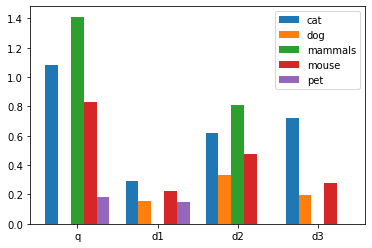

In [70]:
tfidf=[]

tfidf.append(np.array(tf_df.cat)*idf[0])
tfidf.append(np.array(tf_df.dog)*idf[1])
tfidf.append(np.array(tf_df.mammals)*idf[2])
tfidf.append(np.array(tf_df.mouse)*idf[3])
tfidf.append(np.array(tf_df.pet)*idf[4])


tfidf=np.array(tfidf)

docslabel=['q','d1','d2','d3']

size = 4
index = np.arange(size)
total_width, n = 0.8, 5
width = total_width / n
index = index - (total_width - width) / 2

fig = plt.figure()
for i in range(5):
    if i==2:
        plt.bar(index+i*width, tfidf[i], width=width, label=words[i], tick_label=docslabel)
    else:
        plt.bar(index+i*width, tfidf[i], width=width, label=words[i])
plt.legend()
plt.show()


In [71]:
tfidf

array([[1.08048202, 0.2882726 , 0.61760352, 0.72046541],
       [0.        , 0.1548726 , 0.33180352, 0.19341661],
       [1.41096405, 0.        , 0.80650705, 0.        ],
       [0.83048202, 0.2215726 , 0.47470352, 0.27671661],
       [0.1842414 , 0.14739312, 0.        , 0.        ]])

In [72]:
def Similarity(q,docs):
    evaluation=np.array([np.sum(q*d)/(np.sqrt(np.sum(q**2))*np.sqrt(np.sum(d**2))) for d in docs])
    srtArg= np.argsort(evaluation)[::-1]
    srt = np.sort(evaluation)[::-1]
    return [srtArg,srt]

similarity = evaluateSimilarity(tfidf.T[0],tfidf.T[1:4,])

print('Similarities Rank:',similarity[0])
print('Similarities:',similarity[1])

Similarities Rank: [1 2 0]
Similarities: [0.95469481 0.64317528 0.62890671]


## The similarities are [0.95469481 0.64317528 0.62890671] in the log base of 2

## The ranks of docs are 2 3 1

## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particularcase.

Type your answer here:

Precision=TP/(TP+FP)=$300/500=0.6$

Recall=TP/(TP+TF)=$300/(300+50)=0.857$

## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)
Stage I.B (two questions)
Stage I.C (one question)

Part2 (one question)

Part3:
Stage III.A (three questions)
Stage III.B (one question)
Stage III.C (two questions)

Type your answers here: 

# Part1

## A1: 
### Becasue there is an area of shade in the left side of the second picture, causes the different density of detections. we find key points in pictures through calculation of guassian difference in SITF, mainly focusing on features like edges of bulidings and windows. So the shade didn't influential affect the matching.
## A2
### The keypoint orientation is determined from the local image appearance and is covariant to image rotations. Depending on the symmetry of the keypoint appearance, determining the orientation can be ambiguous. When the image feature is not on one single plane, Unrealistic results may be calculated by guassian function. 

## B1
###  The descriptors is highly distinctive and invariant as possible to variations such as changes in viewpoint and illumination. To do this, a 16x16 window around the keypoint is taken. It is divided into 16 sub-blocks of 4x4 size. For each sub-block, 8 bin orientation histogram is created, so 4 X 4 descriptors over 16 X 16 sample array were used in practice. It is represented as a feature vector to form keypoint descriptor. Thus the descriptors are computed over a much larger region than the detection.
## B2
### I think lighting is not a problem here,because in SITF The result is highly distinctive and invariant as possible to variations such as changes in viewpoint and illumination as mentioned before. The reason of mismatch I think is too many high dimensional features at one time.

## C1
### RANSAC-like algorithm for geometric verification can be used in improving the mismatch in Section D. After this algorithm the inliers are consistent with the transformation and are retained, and most mismatches should now be removed.

# Part2

# Part3
## A1

## A2
### because the time required to convert the descriptors into visual words can be precomputed for the images in database, so they don't account into total time.
## A3

## B1
### There are 25 images counted in the result. The score is 1 because the qury image is the same as the first image.
## C1
### In code we can see newScore = len(inliers_word), the score are number of inliners_word.
## C2

### the dismatching images like different buildings and tourists now receive lower scores, so I think the results improved after geometric verification.